# 연령대/성별을 추정하여 연령대/유형별 TOP 10 제품 데이터 프레임을 저장합니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/2nd_project_elice/refine_data

/content/drive/MyDrive/2nd_project_elice/refine_data


- kaggle 데이터 셋 다운로드 합니다.

In [ ]:
# !pip install kaggle
# from google.colab import files
# files.upload()

# ls -1ha kaggle.json

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# # Permission Warning 이 일어나지 않도록 
# !chmod 600 ~/.kaggle/kaggle.json
# # 본인이 참가한 모든 대회 보기 
# !kaggle competitions list

# ls

# !kaggle competitions download -c h-and-m-personalized-fashion-recommendations

# !unzip h-and-m-personalized-fashion-recommendations.zip

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [ ]:
ls

'age_id&attribute&article_id.csv'       customers.csv
'age_id&attribute&fullarticle_id.csv'   man_woman_recommedation.csv
 articles.csv                           transactions.csv


In [ ]:
articles = pd.read_csv("articles.csv",  index_col = 0)
customers = pd.read_csv("customers.csv",  index_col = 0)
transactions = pd.read_csv("transactions.csv",  index_col = 0)

In [ ]:
pd.set_option('display.max_columns', None)
articles.head(5)

,Unnamed: 0,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,3,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
4,4,111565003,111565,20 den 1p Stockings,302,Socks,Socks & Tights,1010016,Solid,13,Beige,2,Medium Dusty,11,Beige,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."


In [ ]:
pd.options.display.max_rows = None
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1273
                       Beanie                         56
                       Belt                          449
                       Bracelet                      172
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    572
                       Dog Wear                       20
                       Earring                      1154
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2101776 entries, 0 to 2101775
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Unnamed: 0        int64  
 1   t_dat             object 
 2   customer_id       object 
 3   article_id        int64  
 4   price             float64
 5   sales_channel_id  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 96.2+ MB


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [ ]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96338 entries, 0 to 96337
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    96338 non-null  int64 
 1   article_id                    96338 non-null  int64 
 2   product_code                  96338 non-null  int64 
 3   prod_name                     96338 non-null  object
 4   product_type_no               96338 non-null  int64 
 5   product_type_name             96338 non-null  object
 6   product_group_name            96338 non-null  object
 7   graphical_appearance_no       96338 non-null  int64 
 8   graphical_appearance_name     96338 non-null  object
 9   colour_group_code             96338 non-null  int64 
 10  colour_group_name             96338 non-null  object
 11  perceived_colour_value_id     96338 non-null  int64 
 12  perceived_colour_value_name   96338 non-null  object
 13  perceived_colour

In [ ]:
articles = articles.drop(columns=['Unnamed: 0'], axis = 1)
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,4,Dark,5,Black,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."
4,111565003,111565,20 den 1p Stockings,302,Socks,Socks & Tights,1010016,Solid,13,Beige,2,Medium Dusty,11,Beige,3608,Tights basic,B,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo..."


In [ ]:
transactions = transactions.drop(columns=['Unnamed: 0'], axis = 1)
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2020-04-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,727808001,0.067780,2
1,2020-04-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,727808007,0.067780,2
2,2020-04-01,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,783504004,0.019051,2
3,2020-04-01,000eae69313b4fc1824fa7e439f168cc140bf4c3f3a7e9...,762096002,0.022576,2
4,2020-04-01,000ec422ba5459f0295c1e86872d61b746bb8f84345efd...,759479001,0.006085,2


- customers 데이터를 확인해보면 많은 null값이 있다는 것을 확인할 수 있습니다.
- 하지만, 우리가 필요한 데이터는 customer_id와 age이므로 나머지는 drop해주고, age 데이터만 결측값처리를 해주겠습니다.

In [ ]:
customers.isnull().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

- 나이 분포를 확인해보면 20-30대 데이터가 가장 많은 것을 확인할 수 있습니다.
- 손님의 최소 나이 16세, 최대 나이 99세로 확인할 수 있습니다.

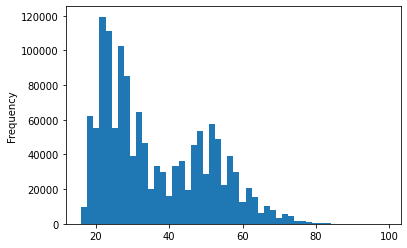

In [ ]:
customers['age'].plot.hist(bins=50)
plt.show()

In [ ]:
print(f"최소 나이 : {customers['age'].min()}")
print(f"최대 나이 : {customers['age'].max()}")

최소 나이 : 16.0
최대 나이 : 99.0


- 나이 분포를 확인하고, 연령대를 구분합니다. (0 - 16~19, 1 - 20-29, 2 - 30-39, 3 - 40-49, 4 - 50-59, 5 - 60-)

In [ ]:
# 0 - 16~19 
# 1 - 20-29
# 2 - 30-39
# 3 - 40-49
# 4 - 50-59
# 5 - 60-

age_id = 0
age_group = pd.DataFrame(columns =["age","age_id"])
age=16

for i in range(45):
    if 15 < age < 20:
        temp_group = pd.DataFrame({"age":[age, age+1, age+2, age+3], "age_id":[age_id, age_id, age_id, age_id]})
        age_group = age_group.append(temp_group)
        age += 4
        age_id += 1
    elif 19 < age < 60 :
        temp_group = pd.DataFrame({"age":[age, age+1, age+2, age+3, age+4, age+5, age+6, age+7, age+8, age+9], "age_id":[age_id, age_id, age_id, age_id, age_id, age_id, age_id, age_id, age_id, age_id]})
        age_group = age_group.append(temp_group)
        age += 10
        age_id += 1
    else:
        temp_group = pd.DataFrame({"age":[age], "age_id":[age_id]})
        age_group = age_group.append(temp_group)
        age += 1

In [ ]:
age_group = age_group.reset_index(drop=True)
age_group

,age,age_id
0,16,0
1,17,0
2,18,0
3,19,0
4,20,1
5,21,1
6,22,1
7,23,1
8,24,1
9,25,1


- 데이터프레임 shape을 display하는 함수입니다.

In [ ]:
def display_df(df, head=3):
    print(f'The shape of df is {df.shape}.\n')
    display(df.head(head))

- customers에 age를 기준으로 age_group을 merge하고, 쓸모없다고 판단되는 컬럼들을 삭제합니다.

In [ ]:
customers = pd.merge(customers, age_group, on="age", how = "left")
customers = customers.drop(["FN", "Active", "club_member_status", "fashion_news_frequency", "postal_code"], axis=1)

In [ ]:
customers.head()

,customer_id,age,age_id
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,49.0,3
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,25.0,1
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,24.0,1
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,54.0,4
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,52.0,4


- 제품의 유형이 무엇이 있는지 확인하고, 고유 index 번호도 확인합니다.
- 각 유형의 제품의 개수도 확인합니다.

In [ ]:
print(articles["index_group_name"].unique())
print(articles["index_group_no"].unique())

['Ladieswear' 'Baby/Children' 'Menswear' 'Sport' 'Divided']
[ 1  4  3 26  2]


In [ ]:
sex_category = articles[["index_group_no", "index_group_name"]].reset_index()
display(sex_category["index_group_name"].value_counts())

Ladieswear       33874
Baby/Children    32851
Divided          14792
Menswear         11837
Sport             2984
Name: index_group_name, dtype: int64

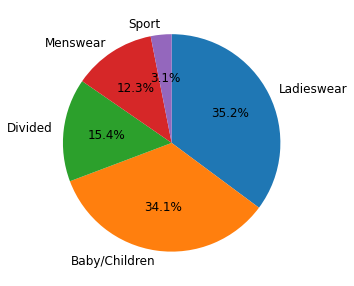

In [ ]:
sex_category_list = sex_category["index_group_name"].value_counts().index.to_list()
plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 12
plt.pie(sex_category["index_group_name"].value_counts().sort_values(ascending=False), 
        labels = sex_category_list, startangle = 90, counterclock=False, autopct="%1.1f%%")
plt.show()

- 고유 인덱스를 각 article_id와 매칭시켜서 새로운 데이터프레임을 만듭니다.
- transactions에 article_id에 맞는 sex_attribute를 merge합니다.

In [ ]:
articles_category_df = pd.DataFrame(articles[["article_id", "index_group_no"]])
articles_category_df.columns = ["article_id", "sex_attribute"]
articles_category_df.head()

,article_id,sex_attribute
0,108775015,1
1,108775044,1
2,108775051,1
3,111565001,1
4,111565003,1


In [ ]:
transactions = pd.merge(transactions, articles_category_df, on = "article_id", how = "left")
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id,sex_attribute
0,2020-04-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,727808001,0.067780,2,3
1,2020-04-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,727808007,0.067780,2,3
2,2020-04-01,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,783504004,0.019051,2,1
3,2020-04-01,000eae69313b4fc1824fa7e439f168cc140bf4c3f3a7e9...,762096002,0.022576,2,1
4,2020-04-01,000ec422ba5459f0295c1e86872d61b746bb8f84345efd...,759479001,0.006085,2,2


- 손님의 구매 유형을 보고, 손님별 어떤 유형을 많이 샀는지 count하는 데이터프레임을 작성합니다.

In [ ]:
cust_sex = transactions[["customer_id", "sex_attribute", "article_id"]].groupby(["customer_id","sex_attribute"]).count().unstack()
cust_sex.columns = ["Woman", "Young", "Man", "kids", "Sports-person"]
cust_sex.head()

,Woman,Young,Man,kids,Sports-person
customer_id,,,,,
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,5.0,1.0,4.0,NaN,NaN
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,8.0,1.0,NaN,NaN,NaN
00009d946eec3ea54add5ba56d5210ea898def4b46c68570cf0096d962cacc75,5.0,1.0,7.0,NaN,NaN
0000c97821eb48d0e590fd309133f0a6c08f7750f64cccf2ba053e11119093c2,1.0,NaN,NaN,NaN,NaN
0000f1c71aafe5963c3d195cf273f7bfd50bbf17761c9199e53dbb81641becd7,5.0,NaN,NaN,NaN,NaN


- 최대로 구매한 제품의 유형으로 손님의 성별을 추정합니다. ( 위 데이터프레임에서 첫번째 손님은 Woman 제품을 많이 샀으니깐 여성으로 판단, 4번째 손님은 Woman, Young, Man 제품들 중 Man을 가장 많이 샀으니깐 남성으로 판단한다.)

In [ ]:
%%time
cust_sex["attribute"] = cust_sex.apply(lambda x : list(x[x == x.max()].index), axis=1)

CPU times: user 1min 18s, sys: 4.63 s, total: 1min 23s
Wall time: 1min 16s


In [ ]:
temp_sex1 = cust_sex.copy()

In [ ]:
temp_sex1.head()

,Woman,Young,Man,kids,Sports-person,attribute
customer_id,,,,,,
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,5.0,1.0,4.0,NaN,NaN,[Woman]
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,8.0,1.0,NaN,NaN,NaN,[Woman]
00009d946eec3ea54add5ba56d5210ea898def4b46c68570cf0096d962cacc75,5.0,1.0,7.0,NaN,NaN,[Man]
0000c97821eb48d0e590fd309133f0a6c08f7750f64cccf2ba053e11119093c2,1.0,NaN,NaN,NaN,NaN,[Woman]
0000f1c71aafe5963c3d195cf273f7bfd50bbf17761c9199e53dbb81641becd7,5.0,NaN,NaN,NaN,NaN,[Woman]


In [ ]:
temp_sex = pd.DataFrame(temp_sex1[["attribute"]]).reset_index()
temp_sex["attribute"] = temp_sex["attribute"].apply(",".join).astype(str)
temp_sex.head()

,customer_id,attribute
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,Woman
1,00007d2de826758b65a93dd24ce629ed66842531df6699...,Woman
2,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,Man
3,0000c97821eb48d0e590fd309133f0a6c08f7750f64ccc...,Woman
4,0000f1c71aafe5963c3d195cf273f7bfd50bbf17761c91...,Woman


- 최대로 나온 값들이 같은 것들에 대해서 처리를 해줘야 합니다.
- 고유한 값인 Woman, Man, Sports-person, Young, kids를 제외한 혼합 유형들을 Woman이 가장 많은 비율을 차지 하니깐 Woman으로 대치해줍니다.

In [ ]:
temp_sex['attribute'].unique()

array(['Woman', 'Man', 'Woman,Young', 'Sports-person', 'Young', 'kids',
       'Woman,Sports-person', 'Woman,Young,Man', 'Woman,Man',
       'Woman,kids', 'Young,Man,Sports-person', 'Young,Sports-person',
       'Woman,Man,Sports-person', 'Young,Man',
       'Woman,Young,Sports-person', 'Man,kids', 'Woman,Man,kids',
       'Young,kids', 'Woman,Young,kids', 'Man,Sports-person',
       'Woman,Man,kids,Sports-person', 'kids,Sports-person',
       'Woman,Young,Man,kids', 'Woman,Young,kids,Sports-person',
       'Young,kids,Sports-person', 'Woman,Young,Man,Sports-person',
       'Young,Man,kids', 'Woman,kids,Sports-person',
       'Man,kids,Sports-person'], dtype=object)

In [ ]:
temp_sex.loc[~((temp_sex["attribute"] == "Woman") |
               (temp_sex["attribute"] == "Young")  |
               (temp_sex["attribute"] == "Man")    |
               (temp_sex["attribute"] == "kids") |
               (temp_sex["attribute"] == "Sports-person")), "attribute"] = "Woman"
temp_sex.head()

,customer_id,attribute
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,Woman
1,00007d2de826758b65a93dd24ce629ed66842531df6699...,Woman
2,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,Man
3,0000c97821eb48d0e590fd309133f0a6c08f7750f64ccc...,Woman
4,0000f1c71aafe5963c3d195cf273f7bfd50bbf17761c91...,Woman


In [ ]:
print(temp_sex.attribute.unique())

['Woman' 'Man' 'Sports-person' 'Young' 'kids']


<function matplotlib.pyplot.show>

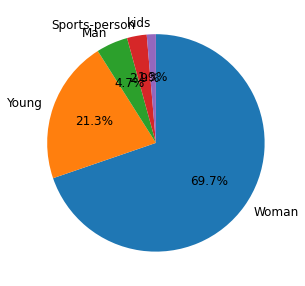

In [ ]:
temp = temp_sex["attribute"].value_counts().index.to_list()
plt.figure(figsize=(5, 5))
plt.rcParams["font.size"] = 12
plt.pie(temp_sex["attribute"].value_counts().sort_values(ascending=False), 
        labels = temp, startangle = 90, counterclock=False, autopct="%1.1f%%")
plt.show

In [ ]:
print(temp_sex["attribute"].value_counts().sort_values(ascending=False))

Woman            249883
Young             76276
Man               16853
Sports-person     10480
kids               4829
Name: attribute, dtype: int64


In [ ]:
temp_sex.shape

(358321, 2)

- 전처리에서 이미지가 없는 데이터와 underwear 제품 데이터를 삭제했기 때문에 구매내역이 없는 손님들이 존재하기 때문에 NaN값이 많이 생겼습니다.
- transactions 파일이 데이터(2천만개)가 있어서 처리하는데 곤란하여 2020-04 ~ 2020-06 데이터만 사용하기로 결정했기 때문에 4-6월에서 구매내역이 없는 손님들도 존재합니다.
- 구매내역이 없는 손님이므로 삭제해줍니다.

In [ ]:
customers = pd.merge(customers, temp_sex, on ="customer_id", how="left")
customers.head(30)

,customer_id,age,age_id,attribute
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,49.0,3,NaN
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,25.0,1,NaN
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,24.0,1,Woman
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,54.0,4,NaN
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,52.0,4,NaN
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN
6,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,20.0,1,NaN
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,32.0,2,Woman
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,20.0,1,NaN
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,20.0,1,NaN


In [ ]:
customers.head()

,customer_id,age,age_id,attribute
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,49.0,3,NaN
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,25.0,1,NaN
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,24.0,1,Woman
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,54.0,4,NaN
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,52.0,4,NaN


In [ ]:
customers.isnull().sum()

customer_id          0
age              15861
age_id           15861
attribute      1013659
dtype: int64

In [ ]:
customers.shape

(1371980, 4)

In [ ]:
customers.dropna(axis = 0, subset=['age', 'age_id', 'attribute'], inplace=True)

In [ ]:
customers.isnull().sum()

customer_id    0
age            0
age_id         0
attribute      0
dtype: int64

In [ ]:
customers.shape

(356574, 4)

- 아래와 같은 방식으로 attribute는 여성으로 대치하고, 나이는 해당 연령대의 평균나이로 대치할 수 있으나 이미지나 다른 상품 정보를 뽑을 때 에러 발생 가능성이 존재합니다.

In [ ]:
# customers["attribute"].fillna("Woman", inplace = True)

# age_mean = customers[["age", "attribute"]].groupby("attribute").mean().round().reset_index()
# age_mean.columns = ["attribute", "age_mean"]

# customers = pd.merge(customers, age_mean, on = "attribute", how ="left")
# customers.loc[(customers["age"].isnull()), "age"] = customers["age_mean"]
# customers = customers.drop(["age_mean", "age_id"], axis =1)
# customers = pd.merge(customers, age_group, on="age", how="left")
# customers.isnull().sum()

In [ ]:
transactions = pd.merge(transactions, customers, on ="customer_id", how ="left")
transactions.isnull().sum()

t_dat                  0
customer_id            0
article_id             0
price                  0
sales_channel_id       0
sex_attribute          0
age                 7596
age_id              7596
attribute           7596
dtype: int64

In [ ]:
transactions.dropna(axis = 0, subset=['age', 'age_id', 'attribute'], inplace=True)

In [ ]:
transactions.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
sex_attribute       0
age                 0
age_id              0
attribute           0
dtype: int64

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094180 entries, 0 to 2101775
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
 5   sex_attribute     int64  
 6   age               object 
 7   age_id            object 
 8   attribute         object 
dtypes: float64(1), int64(3), object(5)
memory usage: 159.8+ MB


In [ ]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id,sex_attribute,age,age_id,attribute
0,2020-04-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,727808001,0.067780,2,3,24.0,1,Woman
1,2020-04-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,727808007,0.067780,2,3,24.0,1,Woman
2,2020-04-01,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,783504004,0.019051,2,1,29.0,1,Woman
3,2020-04-01,000eae69313b4fc1824fa7e439f168cc140bf4c3f3a7e9...,762096002,0.022576,2,1,67.0,5,Woman
4,2020-04-01,000ec422ba5459f0295c1e86872d61b746bb8f84345efd...,759479001,0.006085,2,2,18.0,0,Young


- 여성이라고 판단되는 고객의 구매내역이 가장 많은 것을 확인할 수 있습니다.

In [ ]:
transactions['attribute'].value_counts()

Woman            1543999
Young             387820
Man               103111
Sports-person      35615
kids               23635
Name: attribute, dtype: int64

- 각 연령대 별/성별 별 구매 count를 계산합니다.

In [ ]:
transactions.article_id = ' ' + transactions.article_id.astype('str')
temp = transactions.groupby(['age_id','attribute','article_id'])['customer_id'].agg('count').reset_index()
temp.columns = ['age_id','attribute','article_id','count']
transactions = transactions.merge(temp, on=['age_id','attribute','article_id'], how='left')
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id,sex_attribute,age,age_id,attribute,count
0,2020-04-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,727808001,0.067780,2,3,24.0,1,Woman,3
1,2020-04-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,727808007,0.067780,2,3,24.0,1,Woman,4
2,2020-04-01,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,783504004,0.019051,2,1,29.0,1,Woman,58
3,2020-04-01,000eae69313b4fc1824fa7e439f168cc140bf4c3f3a7e9...,762096002,0.022576,2,1,67.0,5,Woman,14
4,2020-04-01,000ec422ba5459f0295c1e86872d61b746bb8f84345efd...,759479001,0.006085,2,2,18.0,0,Young,81


In [ ]:
transactions = transactions.sort_values(['count','t_dat'],ascending=False)
transactions = transactions.drop_duplicates(['age_id','attribute','article_id'])
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id,sex_attribute,age,age_id,attribute,count
2065636,2020-06-01,14394caee60b3ebc3c111b66b28164e03a4c2ba247c14f...,741356002,0.033881,2,1,25.0,1,Woman,2132
2066929,2020-06-01,1e822c5d17fea8069b708ed83cd0e3b2afb3517a39ef97...,759871002,0.006763,1,2,21.0,1,Young,1416
2064792,2020-06-01,0db2f7adcaccca01e7bab8e45d190fcae8e303b5c0e66f...,706016001,0.033881,2,2,22.0,1,Young,1409
2063419,2020-06-01,032cc9d54c418d7fbdb1844081d7b80901ebebfc01dcb0...,749699002,0.025407,2,1,23.0,1,Woman,1326
2064404,2020-06-01,0b3aa8ceb27d63f454080dc8f2b2cedb764e33154a2c23...,753737001,0.042356,2,1,23.0,1,Woman,1313


In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184291 entries, 2065636 to 31641
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   t_dat             184291 non-null  object 
 1   customer_id       184291 non-null  object 
 2   article_id        184291 non-null  object 
 3   price             184291 non-null  float64
 4   sales_channel_id  184291 non-null  int64  
 5   sex_attribute     184291 non-null  int64  
 6   age               184291 non-null  object 
 7   age_id            184291 non-null  object 
 8   attribute         184291 non-null  object 
 9   count             184291 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 15.5+ MB


- article_id 리스트를 받으면 이미지 폴더에 접근해서 해당 제품의 이미지를 출력해주는 함수입니다.

In [ ]:
from PIL import Image

In [ ]:
def show_images(article_ids, cols=1, rows=-1):
    if isinstance(article_ids, int) or isinstance(article_ids, str):
        article_ids = [article_ids]
    article_count = len(article_ids)
    if rows < 0: rows = (article_count // cols) + 1
    plt.figure(figsize=(3 + 3.5 * cols, 3 + 5 * rows))
    for i in range(article_count):
        article_id = ("0" + str(article_ids[i]))[-10:]
        plt.subplot(rows, cols, i + 1)
        plt.axis('off')
        plt.title(article_id)
        try:
            image = Image.open(f"../images/{article_id[:3]}/{article_id}.jpg")
            plt.imshow(image)
        except:
            pass

- 연령대/유형별 article_id 데이터와 길이를 저장합니다.

In [ ]:
recommend_sex_age = pd.DataFrame(transactions.groupby(["age_id", "attribute"]).article_id.sum().reset_index())
recommend_sex_age["len"] = recommend_sex_age["article_id"].apply(lambda x : len(x))
recommend_sex_age.head()

,age_id,attribute,article_id,len
0,0,Man,685816001 685816002 685816041 685814003 68581...,11870
1,0,Sports-person,720125001 484398001 810838010 853881001 72012...,2420
2,0,Woman,741356002 372860002 673396002 832453002 37286...,71740
3,0,Young,759871001 759871002 706016001 706016002 75946...,50770
4,0,kids,820341001 869399003 796735001 816790005 83123...,3570


- 연령/유형 별 article_id top 10개의 article_id를 뽑아서 새로운 데이터 프레임에 저장합니다.
- recommend_sex_age 데이터 프레임에 concat해서 파일로 저장합니다.

In [ ]:
article_id_ten = pd.DataFrame(columns=["article_id"])

In [ ]:
for i in range(30):
  temp_article = pd.DataFrame({"article_id" : " ".join(recommend_sex_age[['article_id']].iloc[i, 0].split()[:10])}, index = [0]) # index = [0] 을 붙이는 이유는 데이터프레임의 모든 값이 스칼라 값일때 인덱스를 붙여야하기 때문이다. 
  article_id_ten = article_id_ten.append(temp_article)

In [ ]:
article_id_ten = article_id_ten.iloc[:30,0]

In [ ]:
article_id_ten = pd.DataFrame(article_id_ten, columns=["article_id"]).reset_index(drop=True)

In [ ]:
article_id_ten.head()

,article_id
0,685816001 685816002 685816041 685814003 685813...
1,720125001 484398001 810838010 853881001 720125...
2,741356002 372860002 673396002 832453002 372860...
3,759871001 759871002 706016001 706016002 759465...
4,820341001 869399003 796735001 816790005 831236...


In [ ]:
temps=recommend_sex_age.drop(columns=["article_id", "len"])

In [ ]:
recommend_sex_age = pd.concat([temps, article_id_ten], axis = 1)

In [ ]:
recommend_sex_age.head()

,age_id,attribute,article_id
0,0,Man,685816001 685816002 685816041 685814003 685813...
1,0,Sports-person,720125001 484398001 810838010 853881001 720125...
2,0,Woman,741356002 372860002 673396002 832453002 372860...
3,0,Young,759871001 759871002 706016001 706016002 759465...
4,0,kids,820341001 869399003 796735001 816790005 831236...


In [ ]:
for i in range(0,15):
  show_images(recommend_sex_age.iloc[i,2].split(), 10)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
recommend_sex_age.to_csv('age_id&attribute&article_id.csv')